<a href="https://colab.research.google.com/github/beatricecxx/beatricecxx.github.io/blob/main/AdvertisementEffectivenessAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In this project, we are trying to estimate the volume of sales based on how much we spend on various social media ads.

Business questions:

1) How much advertisement budget should we allocate for FB, google and IG ?

2) How much sales will we get if don't spend on social media ads ?

3) Which areas (large or small, urban or rural or suburban) should we focus our ads on ? What is the expected revenue ?


# **Data Understanding**

First, lets import the dataset and do some basic EDA.

In [ ]:
df = pd.read_excel("https://github.com/beatricecxx/DataScienceClass/blob/main/social-ads-raw.xlsx?raw=true")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   segment    200 non-null    int64  
 1   google     200 non-null    float64
 2   facebook   200 non-null    float64
 3   instagram  200 non-null    float64
 4   sales      200 non-null    float64
 5   size       200 non-null    object 
 6   area       200 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 11.1+ KB


,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,large,rural
1,2,44.5,39.3,45.1,10.4,small,urban
2,3,17.2,45.9,69.3,9.3,small,rural
3,4,151.5,41.3,58.5,18.5,small,urban
4,5,180.8,10.8,58.4,12.9,large,suburban


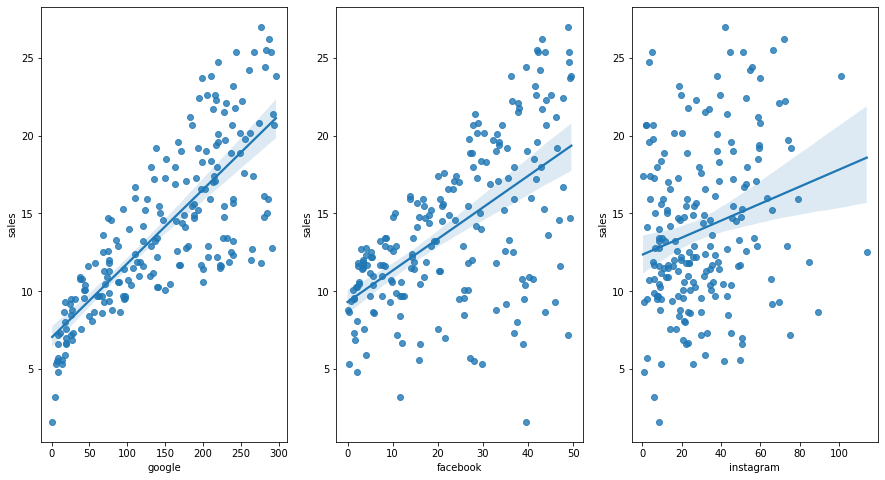

In [ ]:
fig, subs = plt.subplots(1,3, figsize=(15,8))

sns.regplot(data=df, x='google', y='sales', ax=subs[0])
sns.regplot(data=df, x='facebook', y='sales', ax=subs[1])
sns.regplot(data=df, x='instagram', y='sales', ax=subs[2])

Plotting the charts for google, FB and IG, we can check if they have a linear relationship with sales.

From here, we can tell that IG does not show a linear relationship with sales based on the graphs more spread out appearance and line of best-fits inaccuracy. Thus, we should allocate less ad budget for IG, tentatively let's say around 10K.

On the other hand, Google and FB do show a linear relationship with sales, so we can allocate the remaining 90k budget here. But which one to allocate more? For that we will need to take a more detailed look at their coefficient's values first.

EDA, we perform exploratory data analysis by plotting a chart then we perform modelling, we use LR model to do the prediction

# **Modelling**

For this section, we will be constructing a linear regression model to help estimate the volume of sales based on different budgetting configurations. To do so we can use sales as our target variable and perform some supervised learning using the other columns.

In [ ]:
#perform LR on these columns data with the sales
#if we know how much we allocated for google, FB and IG we can predict the sales iwth LR models
#sales is the label here or target variable, what we want to predict
#LR model is supervised learning techniques, need to set a label, tell the machine what you want to predict based on what
columns =['google', 'facebook', 'instagram']
x = df[columns]
y = df['sales']
model = LinearRegression()
model.fit(x,y)

LinearRegression()

Now we can evaluate the accuracy of the model.

In [ ]:
#display the R square, to measure the accuracy of the LR models
model.score(x,y)

0.8972106381789522

In [ ]:
#calculate intercept & coefficient for each variables google, FB, IG , IG shows negative correlationship with sales
#if we did not spend on the ads, intercept give us the value of sales without ads
#looking at the coefficient value for google and FB, FB provides stronger +tive coefficient relationship with sales, allocate 50k, then google 4k
print("Intercept :", model.intercept_)
print("Coefficient :", model.coef_)

Intercept : 2.938889369459412
Coefficient : [ 0.04576465  0.18853002 -0.00103749]


In the cell above, we calculate the intercept and coefficients for each variable in our dataset. Surprisingly, the coefficient for IG is very slightly negative, while this may not be enough to justify abandoning IG entirely, the company should definitely cut down on their spending there. Furthermore, since FB has a higher coefficient compared to Google, we can allocate slight more to it, let's say 50k to FB and 40k to Google.

Additionally, to answer the question of how much sales the company generates without any ads, we can compute the intercept value, which in this case acts as an estimate for the sales without ads.

Next, we can deploy the results of the model prediction and present our findings.

In [ ]:
#using the intercept value we can predict the sales gained if we did not spend a single dollar on the ads
#assume the unit price for our product is 5000
#y=mx+c
#Google

unit_price = 5000
predicted_sales = 0
predicted_sales = (0.04576465 + 2.938889369459412 * 1000) * unit_price
print(f"Google : {predicted_sales:,.2f}")

unit_price = 5000
predicted_sales = 0
predicted_sales = (0.18853002 + 2.938889369459412 * 1000) * unit_price
print(f"Facebook : {predicted_sales:,.2f}")

unit_price = 5000
predicted_sales = 0
predicted_sales = (-0.00103749 + 2.938889369459412 * 1000) * unit_price
print(f"Instagram : {predicted_sales:,.2f}")

Google : 14,694,675.67
Facebook : 14,695,389.50
Instagram : 14,694,441.66


Now we need to perform data preparation here, we do perform data cleaning to make sure we can use LR model later. Thus, we need to remap the size column to 0 or 1



In [ ]:
#convert the size column to binary data type that contains 0  and 1 value only with map functions
#display the df
df['size'] = df['size'].map({"small":0, "large":1})
df

,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,1,rural
1,2,44.5,39.3,45.1,10.4,0,urban
2,3,17.2,45.9,69.3,9.3,0,rural
3,4,151.5,41.3,58.5,18.5,0,urban
4,5,180.8,10.8,58.4,12.9,1,suburban
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,0,suburban
196,197,94.2,4.9,8.1,9.7,0,urban
197,198,177.0,9.3,6.4,12.8,0,suburban
198,199,283.6,42.0,66.2,25.5,0,rural


In [ ]:
#convert the area to numeric value 0 or 1 only for each type using dummies()
#display the df
df = pd.get_dummies(data=df, columns=['area'])
df

,segment,google,facebook,instagram,sales,size,area_rural,area_suburban,area_urban
0,1,230.1,37.8,69.2,22.1,1,1,0,0
1,2,44.5,39.3,45.1,10.4,0,0,0,1
2,3,17.2,45.9,69.3,9.3,0,1,0,0
3,4,151.5,41.3,58.5,18.5,0,0,0,1
4,5,180.8,10.8,58.4,12.9,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,0,0,1,0
196,197,94.2,4.9,8.1,9.7,0,0,0,1
197,198,177.0,9.3,6.4,12.8,0,0,1,0
198,199,283.6,42.0,66.2,25.5,0,1,0,0


After perform data cleaning as above, we run the LR model again with more variable included and we evaluate the model results

In [ ]:
#we can predict the sales amount if we know the value inside the column below using LR models
#we need to convert size, area rural, area suburban, area urban to binary types first as what we did before
#data preprocesing, clean the data because LR model cannot process text data type
#we used LR model to do the prediction
#LR model is a supervised learning model, need to set a label or target variable, sales,
#we need to specify the value y, sales, what you want to predict here
#we want to predict the sales based on the value insdie the column here, if we know X the i can predict y

columns = ['google', 'facebook', 'instagram', 'size', 'area_rural', 'area_suburban', 'area_urban']
x = df[columns]
y = df['sales']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
# R square calculation, to measure the accuracy of the model
model.score(x,y)

0.8981611875394304

In [ ]:
#calculate the intercept and coefficient
print("Intercept :", model.intercept_)
print("Coefficient :", model.coef_)

Intercept : 2.9280493329187873
Coefficient : [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.05385834 -0.16042133
  0.21427968]


Now, we can test our model on different budgetting configurations and present the findings.

In [ ]:
#marketing budget for 100k for small and urban area, 50k on google, 40k on FB and 10k for IG

prediction = model.predict([[50, 40, 10, 0, 0 ,0, 1]])
print(f"Model Prediction : {prediction}")
unit_price = 5000
expected_revenue = 12.93332037 * 1000 * unit_price
print(f"Expected Revenue : {expected_revenue:,.2f}")

Model Prediction : [12.93332037]
Expected Revenue : 64,666,601.85


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#marketing budget for 100k for small and rural area, 50k on google, 40k on FB and 10k for IG

prediction = model.predict([[50, 40, 10, 0, 1 ,0, 0]])
print(f"Model Prediction : {prediction}")
unit_price = 5000
expected_revenue = 12.66518235 * 1000 * unit_price
print(f"Expected Revenue : {expected_revenue:,.2f}")

Model Prediction : [12.66518235]
Expected Revenue : 63,325,911.75


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#marketing budget for 100k for large and urban area, 50k on google, 40k on FB and 10k for IG

prediction = model.predict([[50, 40, 10, 1, 0 ,0, 1]])
print(f"Model Prediction : {prediction}")
unit_price = 5000
expected_revenue = 13.01071698 * 1000 * unit_price
print(f"Expected Revenue : {expected_revenue:,.2f}")

Model Prediction : [13.01071698]
Expected Revenue : 65,053,584.90


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#marketing budget for 100k for small and suburban area, 50k on google, 40k on FB and 10k for IG

prediction = model.predict([[50, 40, 10, 1, 0 ,1, 0]])
print(f"Model Prediction : {prediction}")
unit_price = 5000
expected_revenue = 12.63601597 * 1000 * unit_price
print(f"Expected Revenue : {expected_revenue:,.2f}")

Model Prediction : [12.63601597]
Expected Revenue : 63,180,079.85


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#marketing budget for 100k for large and rural area, 50k on google, 40k on FB and 10k for IG

prediction = model.predict([[50, 40, 10, 1, 1 ,0, 0]])
print(f"Model Prediction : {prediction}")
unit_price = 5000
expected_revenue = 12.74257896 * 1000 * unit_price
print(f"Expected Revenue : {expected_revenue:,.2f}")

Model Prediction : [12.74257896]
Expected Revenue : 63,712,894.80


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   segment        200 non-null    int64  
 1   google         200 non-null    float64
 2   facebook       200 non-null    float64
 3   instagram      200 non-null    float64
 4   sales          200 non-null    float64
 5   size           200 non-null    int64  
 6   area_rural     200 non-null    uint8  
 7   area_suburban  200 non-null    uint8  
 8   area_urban     200 non-null    uint8  
dtypes: float64(4), int64(2), uint8(3)
memory usage: 10.1 KB
